Working on my first ML problem.The data and the info is available here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.
Our goal is to predict whether the breast cancer is malignant or benign using the info given by studying the FNA of a breast tumour.

Some Problem Intro Info:

What is a Biopsy ?
A procedure which involves removal of tissues ad studying to identify cancer or the severity/extent of any disease. A biospy is most of the times the only sure way to diagnose cancer. FNA is a type of biopsy. 
Our data comes from a Fine Needle Aspiration(FNA) which was performed on the breast mass. Features in our data are as noted in the image of the cell nuclei present in this sample.

In [2]:
# Introducing libs to import, read, wrangle and explore the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [10]:
# Reading in the data
data = pd.read_csv('python/Data/breast-cancer-wisconsin-data/data.csv')

We will start by exploring the dataset and cleaning it if that is required.

## Exploring the data

In [4]:
# Looking at the names of the features 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Taking a look at how to dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Checking data types of columns and number of null values(if any)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

The last column is full of Nan values. Thus has no relevance to our data. Other columns have no null values and its a pretty clean dataset.

We also see that values in the different features are mostly floats.

In [11]:
del data['Unnamed: 32']

Let's also transform our response variable to a numeric response variable.

In [12]:
# As the 'diagnosis' column is our response variable, we must create a numerical feature for it where 1 stands for 'M' and 0 is
# for 'B'
data['y']= data['diagnosis'].apply(lambda x : 1 if x =='M' else 0)

Lets now check how many cases of each type ('Malignant' and 'Benign') do we have.

In [13]:
# Checking if classes are unbalanced or balanced
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

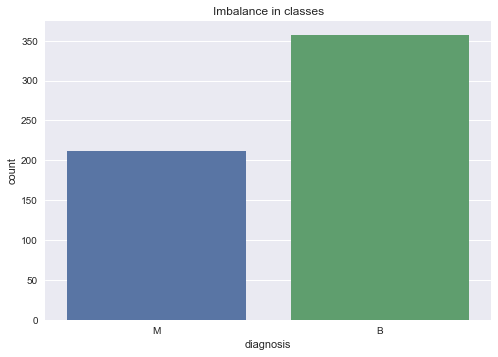

In [14]:
# Creating a plot to show imbalance in classes
sns.countplot(data.diagnosis)
plt.title('Imbalance in classes')

We see that 'Benign' cases are much more in number than 'Malignant' cases. 

The ratio of 'Malignant' cases to total cases is : 212/(212 + 357) = 0.37 appx

The ratio of 'Benign' cases to total cases is : 357/(212+357) = 0.627 appx

Because of this imbalance we shouldn't use 'accuracy' as a metric but maybe the 'f1 score' or some variant of the 'fbeta score' would be more accurate.

Lets check out the correlation between different features and our response variable just to see if there are any features heavily correlating with it.

##### Remember : Correlation doesn't imply causation so we can't just assume that features with heavy correlation are causing changes in the response variable.

In [19]:
# Checking correlation of features with response variable
print('Features with the max correlation with y :')
print(data.corr()['y'][:-1].sort_values(ascending = False)[:10]) # top 10 features with highest correlations
print('\n')
# Features with lowest correlation (These are not ordered though as mod of negative values hasn't been taken. We must take the mod to measure strength of the neatively correlated features)
print('Features with the least correlation with y :')
print(data.corr()['y'][:-1].sort_values()[:10]) 

Features with the max correlation with y :
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: y, dtype: float64


Features with the least correlation with y :
smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
Name: y, dtype: float64


Below we check out differences in the means between all features with respect to which group the cases fall in : 'Benign' and 'Malignant'.

In [57]:
# No insights here. Just shows that there is good differnce between most of the means of different features wrt to the classes.
# Also as the range of different features looks to be really different we will have to normalize/scale them.
data.groupby('diagnosis').mean().iloc[:,1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,0.0
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,1.0


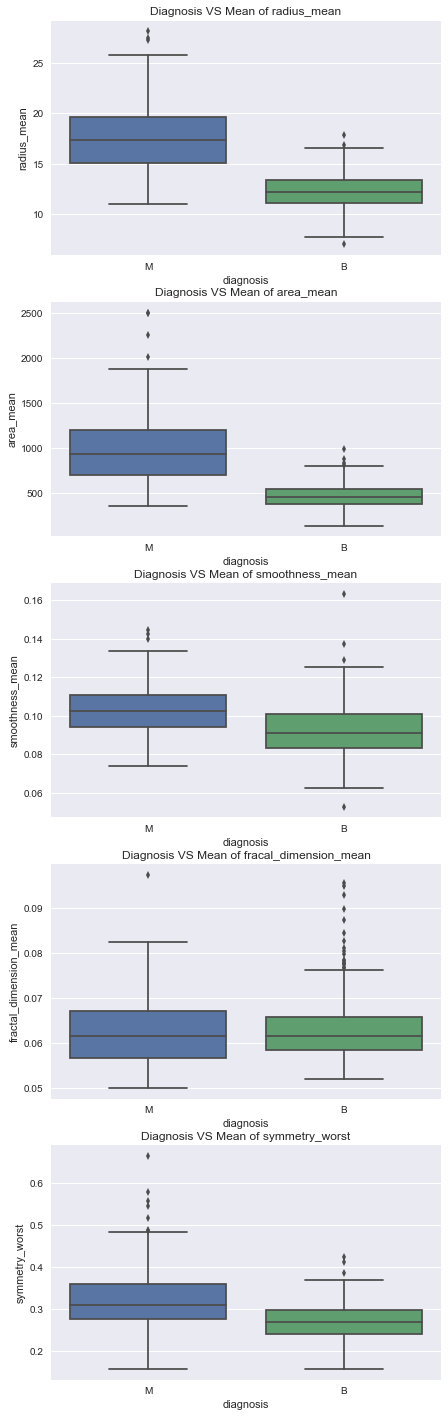

In [60]:
# Lets visualize some of the above differences too 
fig,ax = plt.subplots(5,1,figsize = (7,25))
sns.boxplot('diagnosis','radius_mean',data = data,ax=ax[0])
ax[0].set_title('Diagnosis VS Mean of radius_mean')
sns.boxplot('diagnosis','area_mean',data = data,ax=ax[1])
ax[1].set_title('Diagnosis VS Mean of area_mean')
sns.boxplot('diagnosis','smoothness_mean',data = data,ax=ax[2])
ax[2].set_title('Diagnosis VS Mean of smoothness_mean')
sns.boxplot('diagnosis','fractal_dimension_mean',data = data,ax=ax[3])
ax[3].set_title('Diagnosis VS Mean of fracal_dimension_mean')
sns.boxplot('diagnosis','symmetry_worst',data = data,ax=ax[4])
ax[4].set_title('Diagnosis VS Mean of symmetry_worst')

We again note that the ranges are too different for all these features. Some sort of scaling is required.

Now we check out the distribution shape of the features to check for skewness.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256AA7C6978>,
      dtype=object)

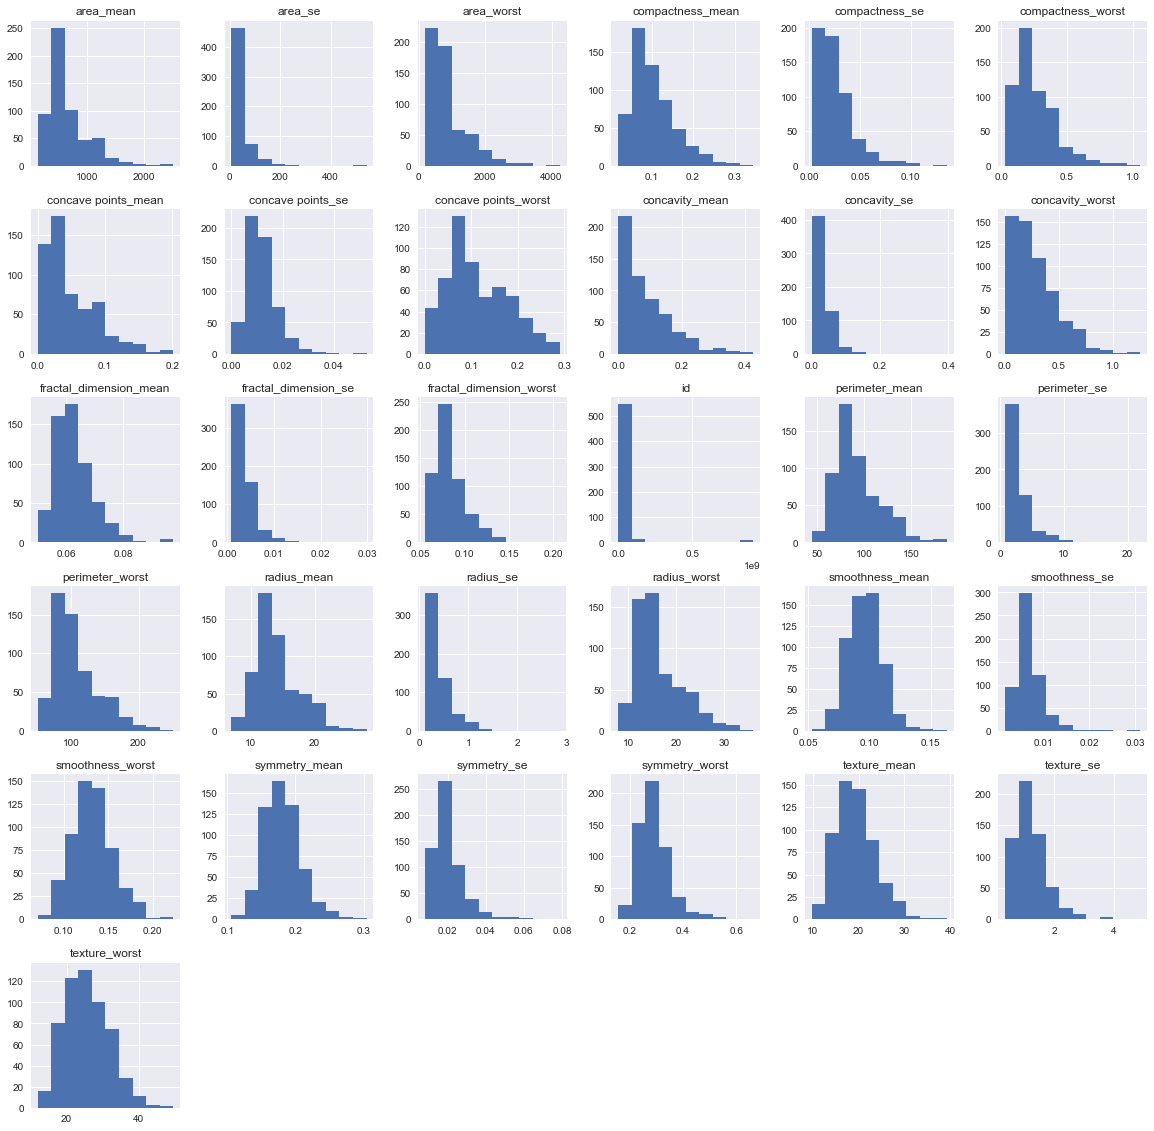

In [66]:
# Checking distributions of the features. Most of them are highly right/positively skewed.
# We must apply logarithmic transformation to them to make them more normal and reduce the rightwards skewness. 
data.iloc[:,:-1].hist(figsize= (20,20))

In [71]:
# Checking skewness strength and direction
skew_before_log = data.loc[:,'radius_mean':'fractal_dimension_worst'].skew()
print(skew_before_log)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

As the all of the distributions are skewed towards the right, we shall apply a logarithmic tranformation to make the distributions more normal and pull the right tails towards the centre.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256AB364B00>,
      dtype=object)

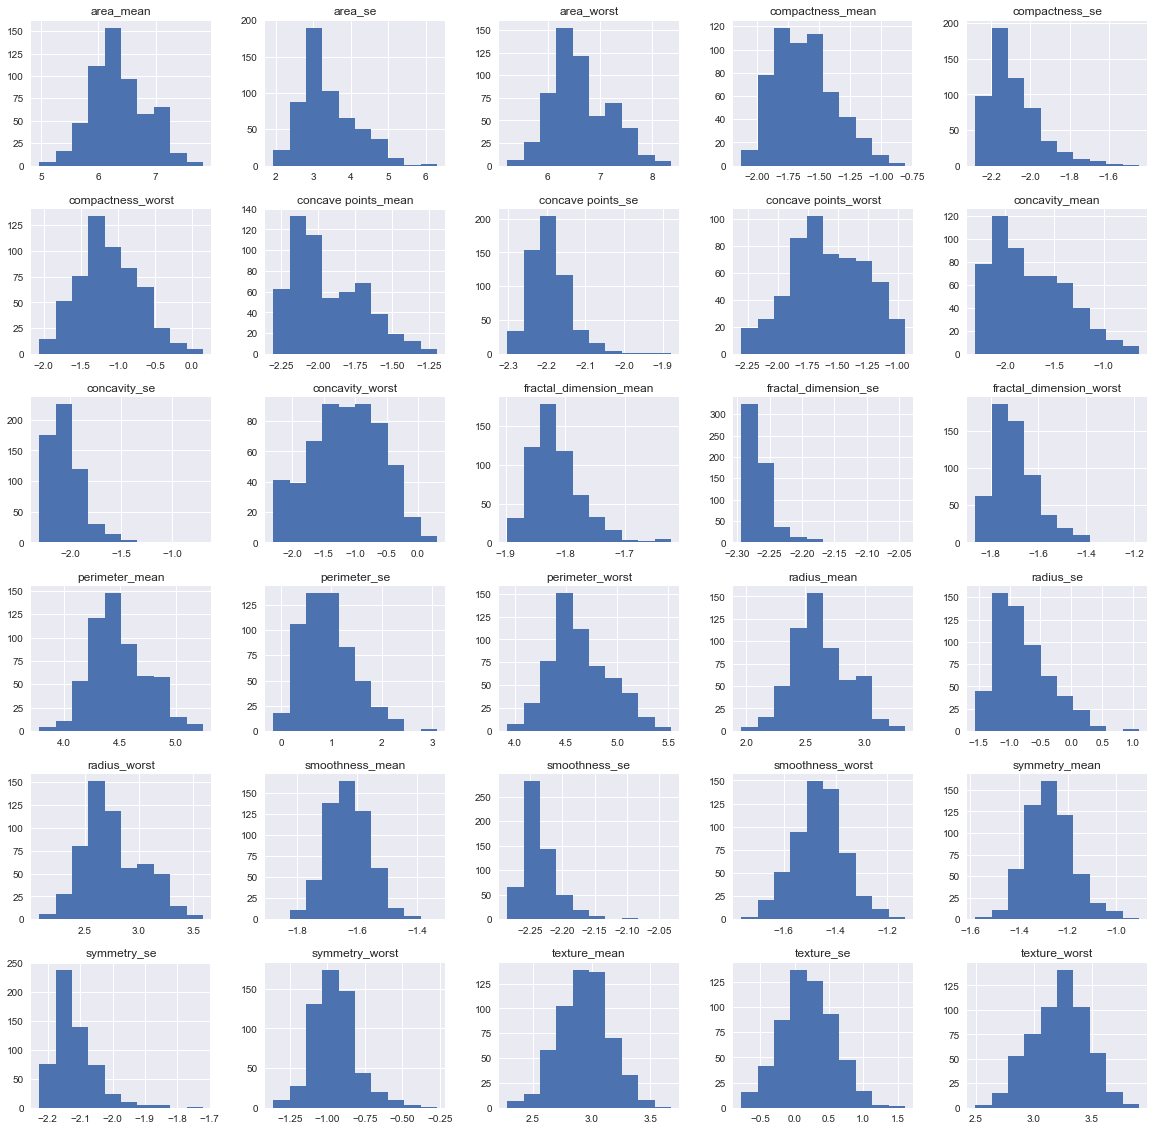

In [69]:
# Make X and y to make it easy to put into train and test categories later
y = data.loc[:,'y']
X = data.iloc[:,2:-1]
# log transform ( We add the '0.1' to x in log to avoid getting : log(0) )
X_log = X.apply(lambda x: np.log(x + 0.1))

# To check how the feature distributions look after log transform
X_log.hist(figsize = (20,20))

In [91]:
skew_after_log = X_log.skew()
print('Amount of skewness reduced :')
print('\n')
print(skew_before_log - skew_after_log)

Amount of skewness reduced :


radius_mean                0.631814
texture_mean               0.660888
perimeter_mean             0.668480
area_mean                  1.360537
smoothness_mean            0.262002
compactness_mean           0.644533
concavity_mean             0.807438
concave points_mean        0.492599
symmetry_mean              0.366948
fractal_dimension_mean     0.194511
radius_se                  2.232933
texture_se                 1.508181
perimeter_se               2.753220
area_se                    4.644365
smoothness_se              0.260092
compactness_se             0.537293
concavity_se               3.184539
concave points_se          0.352275
symmetry_se                0.415144
fractal_dimension_se       0.422709
radius_worst               0.629033
texture_worst              0.621036
perimeter_worst            0.670878
area_worst                 1.403289
smoothness_worst           0.318504
compactness_worst          1.175763
concavity_worst            1.2581

Looks like the log transform has reduced the right skew of all the distributions.

Now finally we will scale the entire dataset. We can use either the MinMaxScaler which brings all the values between (0,1) or the StandardScaler which changes values by making the mean 0 and the standard deviation 1.

In [95]:
# Scale the entire X ds
# This step also brings back all the features within the (0,1) range removing any negative values that were created due to taking log
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_log)

Now our data is ready for the application of machine learning algorithms.

## Applying ML algorithms

First let us import some functions 

In [97]:
# Import Preprocessing, metrics and model optimization algos
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
# Import ML Classification algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Now doing some important stuff :

In [106]:
# Dividing X and y into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state = 0)

In [107]:
# Initializing Different Classifiers
clf_dt = DecisionTreeClassifier()
clf_svc = SVC()
clf_rfc = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_lr = LogisticRegression()

In [108]:
# Making a scoring function to use for CV and GridSearchCV
f_beta_scorer = make_scorer(fbeta_score,beta = 2)

After we have divided dataset into train and test sets, initialized the different classifiers and made the f_beta_scorer we will make a classifier function and a plotting function to make our work easier.

In [109]:
# Making a pipeline that prints classifier name, Cross validation F2 score and F2 score on test set. 
# This function will also return score to help us plot and visualize the scores.
# Also, we will be using F2 score as this problem has unbalanced classes and we need to focus more on recall than precision. An 
# F2 score places more importance on recall value than precision.

def classifier(initialized_clf, X_train, y_train, X_test, y_test):
    
    initialized_clf.fit(X_train,y_train)
    cv_scores = [] 
    
    for i in range(5): # Performing CV 5 times so that we get the means of scores for every iteration for a great estimate. 
        cv_scores.append(cross_val_score(initialized_clf,X_train,y_train,scoring = f_beta_scorer,cv = 5).mean()) 
        
    print(initialized_clf)
    print('\n')
    print('Cross Validation F2 Score is :' , np.mean(cv_scores))
    
    preds = initialized_clf.predict(X_test)
    
    print('F2 score on test set is :', fbeta_score(y_test,preds,2))
    print('\n')
    
    cv_scores_mean_plot = np.mean(cv_scores)
    test_scores_plot = fbeta_score(y_test,preds,2)
    
    return (cv_scores_mean_plot),(test_scores_plot)

# Making a function to plot 2 types of scores: Mean F2 score on 5-fold Cross-Validation and F2 score on Test sets
def plot_classifier(clf_names,clf_cv_score,test_score):
    
    fig, ax = plt.subplots(1,2,figsize = (20,8))
    
    sns.barplot(clf_names,clf_cv_score,ax= ax[0]) 
    ax[0].set_title('F2 CV Scores')
    ax[0].set_yticks(np.linspace(0,1,11))
    ax[0].set_ylim(0,1)
    
    sns.barplot(clf_names,test_score,ax= ax[1])
    ax[1].set_title('F2 test Score')
    ax[1].set_ylim(0,1)
    ax[1].set_yticks(np.linspace(0,1,11))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Cross Validation F2 Score is : 0.8827879131778749
F2 score on test set is : 0.9205776173285198




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Cross Validation F2 Score is : 0.9088167919967198
F2 score on test set is : 0.9003831417624522




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=

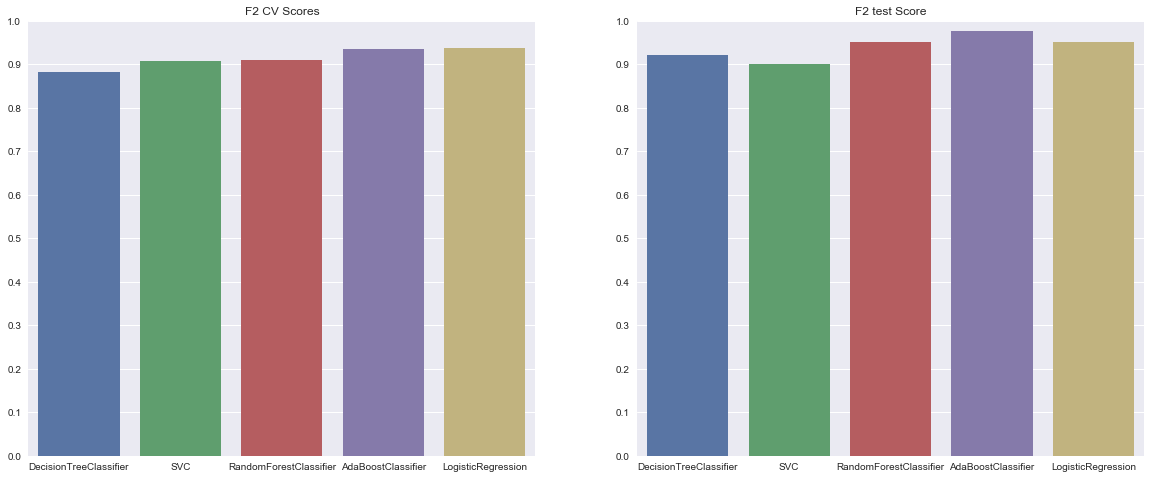

In [110]:
# Create a list with all initialized models
clfs = [clf_dt, clf_svc, clf_rfc, clf_ada, clf_lr]

# Write code to call both plotting and model testing functions
names = []                         # List to store the names of the models for plotting
values_cv_scores = np.zeros(len(clfs))       # array of zeros to store CV scores
values_test_scores = np.zeros(len(clfs))     # array to of zeros to store testing scores

for i in range(len(clfs)):         # This will iterate over the 'clfs' list and run the classifier function on each of the clfs
    values_cv_scores[i],values_test_scores[i] = classifier(clfs[i],X_train,y_train,X_test,y_test)
    print('\n')
    names.append(re.match(r'[A-Za-z]+',str(clfs[i]))[0]) # Extracting the name of the model by extracting all letters before any 
                                                         # special character
    
plot_classifier(names,values_cv_scores,values_test_scores)

Based on the above scores we would like to go ahead with AdaBoostClassifier and Logistic Regression as we will be only seeing the scores on the training batch not the testing batch. The test graphs are just for visualizing and seeing how our algos perform with factory settings.

In [126]:
# Model Optimization
# 1) RandomForestClassifier :: This is done just for fun and experimentation
clf_rfc = RandomForestClassifier(random_state = 0)

params_rfc = {'criterion':['gini','entropy'],'n_estimators':[5,6,7,8,9,10,11,12,15,20],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3]}
best_rfc = GridSearchCV(clf_rfc,params_rfc,f_beta_scorer,cv = 5)
print('RandomForest')
best_rfc.fit(X_train,y_train)
print('Its best parameters are :',best_rfc.best_params_)
print('F2 score with best parameters :',best_rfc.best_score_)
best_rfc_preds = best_rfc.predict(X_test)
print('F2 score on test set: ',fbeta_score(y_test,best_rfc_preds,2))
print('\n')

# 2) AdaBoostClassifier

clf_dt = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator = clf_dt,random_state = 0)

params_ada = {'base_estimator__criterion':['gini','entropy'],'base_estimator__max_depth':[1,2,3,4,5,10,15,20],'n_estimators': [10,20,30,40,100,50]}
best_ada = GridSearchCV(ABC,params_ada,f_beta_scorer,cv= 5)
best_ada.fit(X_train,y_train)
print('AdaBoost')
print('Its best parameters are :',best_ada.best_params_)
print('F2 score with best parameters :',best_ada.best_score_)
best_ada_preds = best_ada.predict(X_test)
print('F2 score on test set :',fbeta_score(y_test,best_ada_preds,2))
print('\n')

# 3) Logistic Regression

params_lr = {'penalty':['l1','l2'],'C':[0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]}
best_lr = GridSearchCV(clf_lr,params_lr,f_beta_scorer, cv = 5)
best_lr.fit(X_train,y_train)
print('Logistic Regression')
print('Its best parameters are :',best_lr.best_params_)
print('F2 score with best parameters :',best_lr.best_score_)
best_lr_preds = best_lr.predict(X_test)
print('F2 score on test set :',fbeta_score(y_test,best_lr_preds,2))
print('\n')


RandomForest
Its best parameters are : {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
F2 score with best parameters : 0.9430228926726714
F2 score on test set:  0.9737827715355805


AdaBoost
Its best parameters are : {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'n_estimators': 100}
F2 score with best parameters : 0.9658669233325192
F2 score on test set : 0.9774436090225564




C:\Users\ishiv\python\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ishiv\python\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ishiv\python\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ishiv\python\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ishiv\python\Anaconda\lib\site-packages\sklearn\metrics\cla

Logistic Regression
Its best parameters are : {'C': 2, 'penalty': 'l1'}
F2 score with best parameters : 0.9453589135473306
F2 score on test set : 0.9505703422053232




We would choose AdaBoost on the basis of the above info. Because we wont have the test set, so we could never know its score on the test set. Thus we choose the one which has performed the best on the training set (with CV).

## Studying Feature Importance

Lets see which features were the most important according to AdaBoost

In [76]:
# We will study feature importance for AdaBoostClassifier

In [112]:
feature_names = X.columns.values
feature_values = clf_ada.feature_importances_

In [113]:
# Sorting the features according to their values from max to min
features_imp = sorted(list(zip(feature_values,feature_names)),reverse = True)

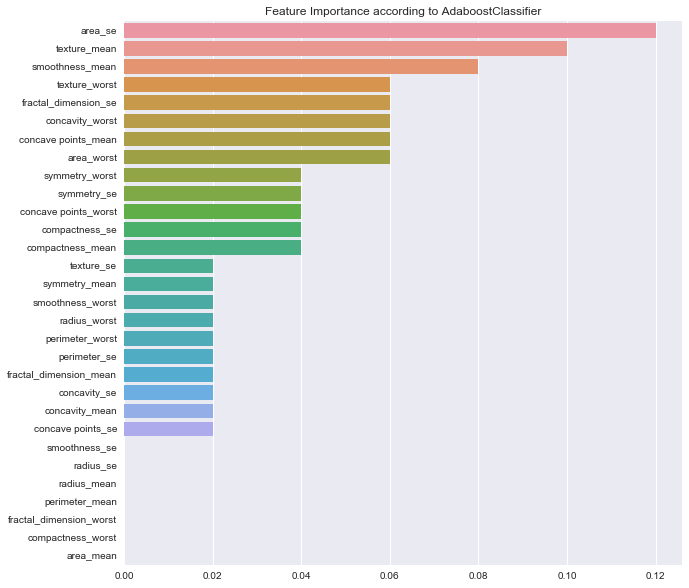

In [114]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
sns.barplot(np.array(features_imp)[:,0].astype('float'), np.array(features_imp)[:,1].astype('str'), orient= 'h')
ax.set_title('Feature Importance according to AdaboostClassifier')

In [115]:
print('We can see the 5 most important features according to the AdaBoostClassifier are : \n')
for i in list(np.array(features_imp[:5])[:,1]):
    print(i)

We can see the 5 most important features according to the AdaBoostClassifier are : 

area_se
texture_mean
smoothness_mean
texture_worst
fractal_dimension_se


## EXTRA : Applying PCA on AdaBoost 

We don't really need to apply PCA here as the number of features (30) is already pretty less. But still we can apply just to see what applying PCA does to our algorithms score on the test set.

In [116]:
from sklearn.decomposition import PCA

In [122]:
# We create a loop to print out the cumulative sum of the 'explained variance ratio' on using different number of principal 
# components 

for i in range(1, X_train.shape[1] + 1):
    pca = PCA(i,random_state = 0)
    X_transformed = pca.fit_transform(X_train)
    print('for {}, cumulative sum of explained variance ratio of all components is : {}'.format(i,np.cumsum(pca.explained_variance_ratio_)[-1]))
    print('\n')
    

for 1, cumulative sum of explained variance ratio of all components is : 0.5433004910563815


for 2, cumulative sum of explained variance ratio of all components is : 0.7096768063771477


for 3, cumulative sum of explained variance ratio of all components is : 0.793250969708077


for 4, cumulative sum of explained variance ratio of all components is : 0.8538761594565902


for 5, cumulative sum of explained variance ratio of all components is : 0.8953667157053009


for 6, cumulative sum of explained variance ratio of all components is : 0.9233829507694173


for 7, cumulative sum of explained variance ratio of all components is : 0.9389716841480394


for 8, cumulative sum of explained variance ratio of all components is : 0.9502194313315463


for 9, cumulative sum of explained variance ratio of all components is : 0.9591267284605617


for 10, cumulative sum of explained variance ratio of all components is : 0.9673881331647037


for 11, cumulative sum of explained variance ratio of all co

We see that for 14 components over 99% of the data is explained, so we shall go for 14 as the no. of components.

In [123]:
pca = PCA(14,random_state = 0)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [125]:
# We use GridSearchCV again but now on the tranformed data with the principal components
clf_dt = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator = clf_dt,random_state = 0)

params_ada = {'base_estimator__criterion':['gini','entropy'],'base_estimator__max_depth':[1,2,3,4,5,10,15,20],'n_estimators': [10,20,30,40,100,50]}
best_ada = GridSearchCV(ABC,params_ada,f_beta_scorer,cv= 5)
best_ada.fit(X_train_transformed,y_train)
print('AdaBoost')
print('The best parameters are :',best_ada.best_params_)
print('F2 score on using the best parameters :',best_ada.best_score_)
best_ada_preds = best_ada.predict(X_test_transformed)
print('F2 score on the test set :',fbeta_score(y_test,best_ada_preds,2))
print('\n')

AdaBoost
The best parameters are : {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 1, 'n_estimators': 10}
F2 score on using the best parameters : 0.9547153202232262
F2 score on the test set : 0.9176029962546816




We find that applying PCA lowered our F2 score on both the test set and on using the best parameters on the training set.

------

That's it for this nb :)